In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import math

In [2]:
def ode_generator(previousData,t,b,k,m):#Creating a function to generate the ode.
    x = previousData[0] #previous displacemet
    xDot = previousData[1] #previous velocity 
    xDotDot = (-b/m)*xDot -(k/m)*x
    return [xDot,xDotDot]


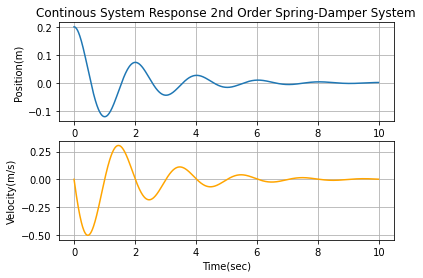

In [3]:
#Initial conditions
intialDisplacement = 0.2
intialVelocity = 0.0
initial_conditions = [intialDisplacement,intialVelocity]

m = 1.0
b = 1.0
k = 10.0

#Time points
t = np.arange(0,10,.01)


res = odeint(ode_generator,initial_conditions,t,args = (b,k,m))

fig,ax = plt.subplots(2)

ax[0].set_title('Continous System Response 2nd Order Spring-Damper System')
ax[0].plot(t,res[:,0])
ax[0].grid()
ax[0].set_ylabel('Position(m)')
ax[1].plot(t,res[:,1],c='orange')
ax[1].set_ylabel('Velocity(m/s)')
ax[1].set_xlabel('Time(sec)')
ax[1].grid()
plt.show()

## Second order Mass-Spring System

$\begin{bmatrix}\dot{v}\\\dot{x}\end{bmatrix}=\begin{bmatrix}\frac{-b}{m}&\frac{-k}{m}\\1&0\end{bmatrix}\begin{bmatrix}v\\x\end{bmatrix} + \begin{bmatrix}\frac{1}{m}\\0\end{bmatrix}\begin{bmatrix}f\end{bmatrix}$

#### Simulation Using First Order Euler Integration
$Assume\ x_0$\
$\dot{x(t)} = f(t,x(t),u(t))$\
$x(t+\Delta{t}) = x(t) + \dot{x}*\Delta{t}$

In [21]:
times = np.arange(0,10,.01)
b=1.0
m=1.0
k=10.0
f=1.0
A = np.array([[-b/m,-k/m],[1.0,0.0]])
U = np.array([[1/m],[0.0]])

X = np.array([[0],[0]])
displacements = [X[1]]
velocities = [X[0]]

In [22]:
t0 = 0
for t in times[1:]:
    Xdot = np.matmul(A,X) + U*f
    X = X + Xdot*(t-t0)
    displacements.append(X[1])
    velocities.append(X[0])
    t0 = t
    


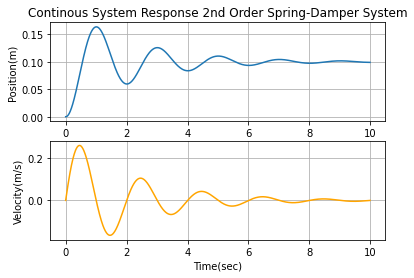

In [23]:
fig,ax = plt.subplots(2)

ax[0].set_title('Continous System Response 2nd Order Spring-Damper System')
ax[0].plot(times,displacements)
ax[0].grid()
ax[0].set_ylabel('Position(m)')
ax[1].plot(times,velocities,c='orange')
ax[1].set_ylabel('Velocity(m/s)')
ax[1].set_xlabel('Time(sec)')
ax[1].grid()
plt.show()

#### Using Matrix Exponential Discretisation Method 
$Assume\ x_0$\
$x_{k+1} = F*x_k + G*x_k$\
$F = e^{A*\Delta{t}}$\
$G = F[ I - e^{A*\Delta{t}}]A^{-1}B$\
$k \to k+1$